# 회귀

**회귀는 여러 개의 독립 변수와 한 개의 종속 변수간의 상관관계를 모델링하는 기법.**

* Y = W1*X1 + W2*X2 + W3*X3 + ... + Wn*Xn이라는 선형 회귀식. Y는 종속 변수. X1, X2, X3 ... Xn은 독립 변수, W1, W2, W3, ... Wn은 이 독립 변수의 값에 영향을 미치는 회귀 계수(Regression coefficients)이다.

* 독립 변수는 피처에 해당되는 종속 변수의 결정값.

* 머신러닝 회귀 예측의 핵심 = 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾는 것.

* 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나뉘며, 독립 변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.

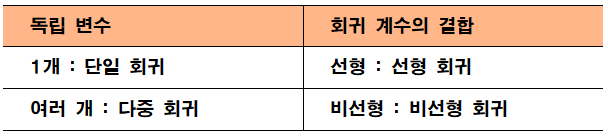

* 분류와 회귀의 가장 큰 차이 = 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고, 회귀는 연속형 숫자값이다.

* 선형 회귀 -> 실제 값과 예측값의 차이(오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화

* 선형 회귀 유형은 규제(Regularization) 방법에 따라 유형을 나눌 수 있으며, 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용.

---

### 선형 회귀 유형

* 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델

* 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.

* 라쏘(Lasso) : 선형 회귀에 L1 규제를 추가한 회귀 모델. L1 규제(=피터 선택 기능)는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.

* 엘라스틱넷(ElasticNet) : L2, L1 규제 결합한 모델. 주로 피처가 많은 데이터 세트에 적용. L1 규제로 피처 개수를 줄이고 L2 규제로 계수 값의 크기를 조정

* 로지스틱 회귀(Logistic Regression) : 분류에 사용되는 선형 모델. 이진 분류뿐만 아니라 희소 영역의 분류. 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.

# 단순 선형 회귀 - 독립 변수(X) 1개, 종속 변수(Y) 1개

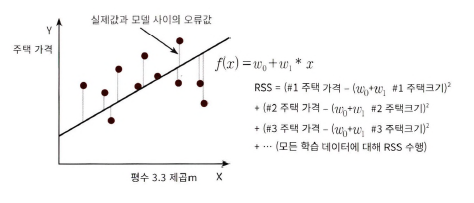

* 예측값 = yhat = a + b * x (a: α의 추정치/ b: β의 추정치)
* 잔차 = 실제 값과 회귀 모델의 차이에 따른 오류 값 (오차에 대한 추정치 / 모집단-오차, 표본집단-잔차)
* 최적의 회귀 모델 = 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델 - 오류 값이 최소가 될 수 있는 최적의 회귀 계수를 찾는 것

### RSS

* 오류 값의 제곱을 구하여 더하는 방식, Error^2 = RSS
* RSS를 최소로 가지는 회귀 계수 w0, w1
* RSS는 회귀식의 독립 변수 X, 종속 변수 Y가 중심 변수가 아닌 w 변수(회귀 계수)가 중심 변수이다.
* RSS = 비용 함수 또는 손실 함수(Loss Function).

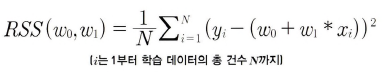

# 비용 최소화 - 경사 하강법(Gradient Descent)

* 경사 하강법 - W 파라미터가 많은 고차원 방식의 문제를 해결해주면서 비용 함수 RSS를 최소화 하는 방법
* 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

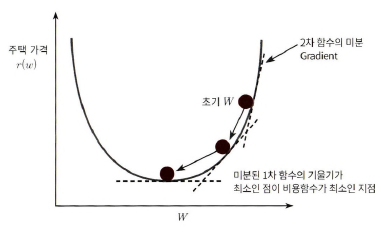


* Step 1: w1, w2를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산.

* Step 2: 편미분 결과값에 학습률(보정계수)를 곱한 것을 마이너스하면서 계산하여 이전 값 업데이트한 후 비용 함수의 값을 계산

* Step 3: 비용함수가 감소했을 경우 Step2를 계속 반복, 감소하지 않으면 그때의 w1, w2를 구하고 반복 중지

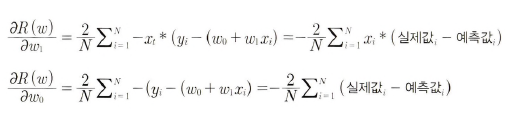


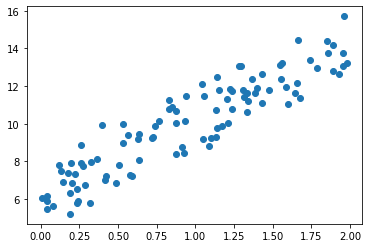

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w2=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
# 비용함수, 실제 y값과 예측된 y값을 인자로 받아서 RSS를 구함
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [3]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열을 계산하고 예측과 실제 값의 차이를 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [4]:
#  입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for _ in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print("w1 : {0:.3f} w0 : {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 3.968 w0 : 6.222
Gradient Descent Total : 0.9924


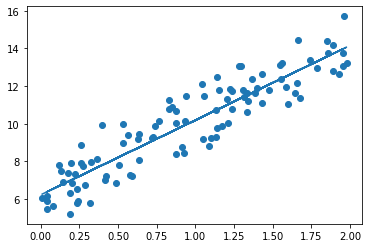

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다.

# 확률적 경사 하강법(Stochastic Gradient Descent)

* 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아닌 일부 데이터만을 이용해 w가 업데이터되는 값을 계산하여 경사 하강법에 비해 빠른 속도를 보장한다.

* 대용량 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [8]:
def stochastic_gradient_descent(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0

    for i in range(iters):
        np.random.seed(i)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[:batch_size]]
        sample_y = y[stochastic_random_index[:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost : 0.9937


확률적 경사 하강법으로 구한 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 별로 차이가 없다. 따라서 큰 데이터를 처리할 경우 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용한다.

**피처가 여러 개인 경우도 1개인 경우를 확장해 유사하게 도출 가능.**
* 피처가 한 개인 경우의 예측값 : yhat = w0 + w1 * X
* 피처가 M개인 경우 그에 따른 회귀 계수도 M + 1개로 도출, yhat = w0 + w1 * X1 + w2 * X2 + ... + wm * Xm

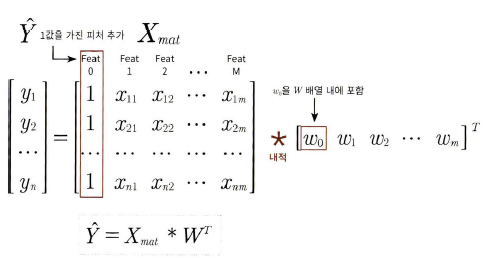